In [1]:
from sympy import diff, symbols
import numpy as np

In [2]:
diff(symbols('x y'), symbols('x')) == diff(symbols('y x'), symbols('x'))

False

In [3]:
x, y, z = symbols('x y z')
expr = x**3 + 4*x*y - z
type(expr)

sympy.core.add.Add

In [4]:
from src.common import Point
from src.lab2.methods import NewtonBase
from src.common.oracul import SymbolOracul, GradientLambdaOracul

x, y, z  = symbols('x y z')
expr = x * 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y 
test = SymbolOracul(expr, ['x', 'y'])
base_differential = GradientLambdaOracul(lambda x, y: 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y,
                                         lambda x, y: np.array([0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x],
                                                               dtype=np.float64))

In [5]:
test.evaluate_hessian(Point(np.array([1, 2, 3])))

array([[1.56, 0.56],
       [0.56, 0.52]])

D:\Desktop\mirror\Methods-of-optimization\src\visualization\animator.py:100: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride'
  contur_ax.contour(xgrid, ygrid, zgrid, rstride=4, cstride=4)


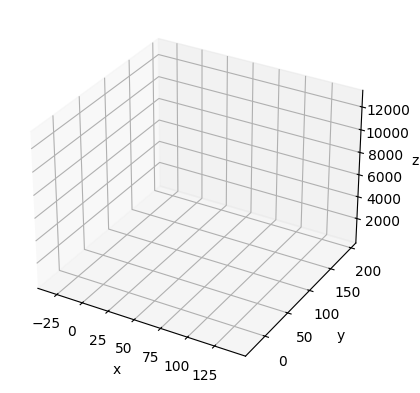

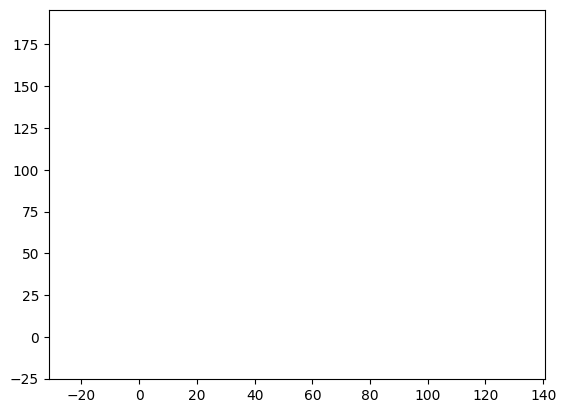

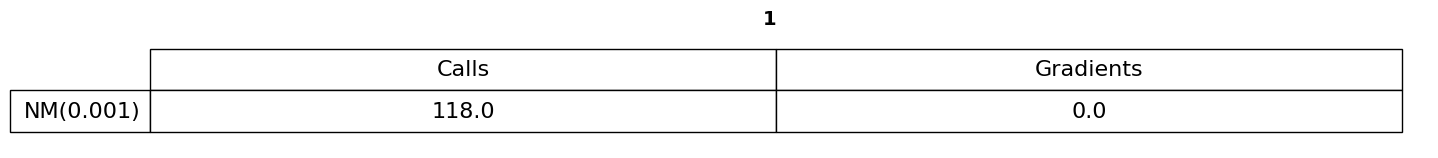

[[Point(coordinates=[-0.03599001909606159, 0.09701996110379696, 0.004460160246406366])]]


In [6]:
from src.lab1.methods import NMMethod
from src.lab1.stop_condition import CountCondition, OrCondition, PrecisionCondition
from src.metric import CallCount, GradientCount
from src.tests.tester import Tester

nm_3 = NMMethod(0.001)
points, anims = Tester.test([nm_3],
            [base_differential], [CallCount(), GradientCount()],
            OrCondition(CountCondition(5000), PrecisionCondition(0.001)), visualize=True,
            start_point=[100, 200], learning_rate=0.01)
print(points)